<b>THE SPARKS FOUNDATION</b>

<b>DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP MAY-21</b>

<b>NAME: MOHAMMAD BASHEER</b>

TASK-2 PREDICTION USING UNSUPERVISED MACHINE LEARNING

* Predicting the Optimum number of clusters using k-means clustering and elbow method from the iris dataset

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data_iris = pd.read_csv(r"C:\Users\dell\Desktop\TSF\Iris.csv")
print(data_iris.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [3]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
np.unique(data_iris['Species']) # to know the unique values present in the column 
#data_iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
len(data_iris['Species'].unique()) # count of the unique values

3

In [6]:
data_iris = data_iris.drop(columns=['Id']) # dropping column Id from the data

C:\Users\dell\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


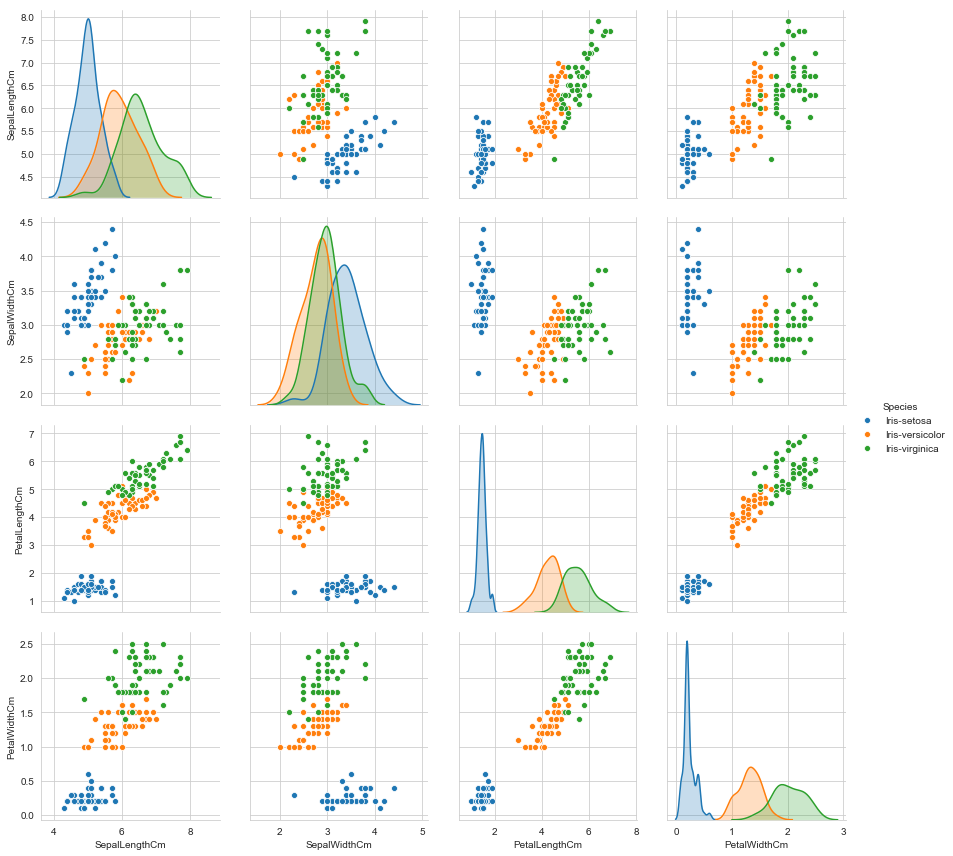

In [7]:
#visualizing dataset using pair plots before clustering so that we can see how the data is distributed
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data_iris, hue = "Species", size = 3);
plt.show()

In [8]:
data_iris1 = data_iris.drop(columns=['Species']) # dropping column species from the data

In [9]:
data_iris1.describe() # computing summary of statistics

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
x = data_iris1.iloc[:, [0, 1, 2, 3]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

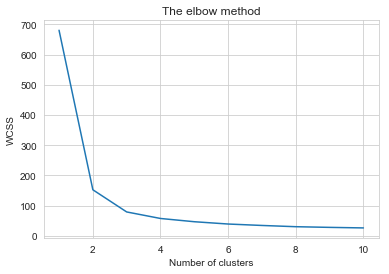

In [11]:
#finding the optimum number of cluters using elbow method

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

we can see here after cluster four within cluster sum of squares decreaing gradually where as before that it was a drastic decrease

In [12]:
km = KMeans(n_clusters=3)
y_km = km.fit_predict(x)
print(km)
print()
print(y_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
# y_predicted = km.predict(x)
# print(y_predicted)

In [ ]:
#print(km.labels_)

In [13]:
data_iris1['cluster'] = y_km # adding prediction to the data so we can understand how the data is clustered
print(data_iris1)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  cluster
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
5              5.4           3.9            1.7           0.4        0
6              4.6           3.4            1.4           0.3        0
7              5.0           3.4            1.5           0.2        0
8              4.4           2.9            1.4           0.2        0
9              4.9           3.1            1.5           0.1        0
10             5.4           3.7            1.5           0.2        0
11             4.8           3.4            1.6           0.2        0
12             4.8           3.0            1.4           0.1        0
13    

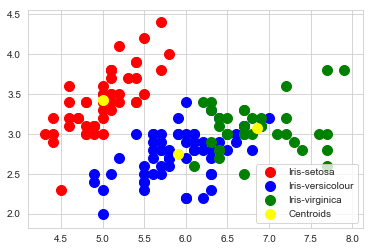

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

<b>thank you.....!</b>

In [ ]:
# sep_len = data_iris1['SepalLengthCm']
# sep_wed = data_iris1['SepalWidthCm']
# petal_len = data_iris['PetalLengthCm']
# petal_wed = data_iris['PetalWidthCm']

# fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1)

# ax1.scatter(x['sep_len'], x['Sepal Width'])
# ax1.title('SepalLengthCm vs SepalWidthCm')
# # ax1.xlabel('sep_len')
# # ax1.ylabel('sep_wed')

# ax1.legend()

# ax2.scatter(sep_len, sep_wed)
# ax2.title('PetalLengthCm vs PetalWidthCm')
# # ax2.xlabel('petal_len')
# # ax2.ylabel('petal_wed')

# ax2.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
# # sep_len = data_iris1['SepalLengthCm']
# # sep_wed = data_iris1['SepalWidthCm']
# # petal_len = data_iris['PetalLengthCm']
# # petal_wed = data_iris['PetalWidthCm']
# import matplotlib.patches as mpatches

# colors = np.array(['red', 'green', 'blue'])
# red_patch = mpatches.Patch(color='red', label='Setosa')
# green_patch = mpatches.Patch(color='green', label='Versicolor')
# blue_patch = mpatches.Patch(color='blue', label='Virginica')


# fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1)


# ax1.scatter(x['SepalLengthCm'], x['SepalWidthCm'], colors =colors)
# ax1.set_title('SepalLengthCm vs SepalWidthCm')
# ax1.set_xlabel('sep_len')
# ax1.set_ylabel('sep_wed')

# ax1.legend(handles=[red_patch, green_patch, blue_patch]

# ax2.scatter(x['PetalLengthCm'], x['PetalWidthCm'], colors =colors)
# ax2.set_title('PetalLengthCm vs PetalWidthCm')
# ax2.set_xlabel('petal_len')
# ax2.set_ylabel('petal_wed')

# ax2.legend(handles=[red_patch, green_patch, blue_patch])

# plt.tight_layout()
# plt.show()